In [1]:
import GPflow
import numpy as np

In [2]:
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
plt = matplotlib.pyplot

In [3]:
#make a dataset with two outputs, correlated, heavy-tail noise. One has more noise than the other.
X1 = np.random.rand(100, 1)
X2 = np.random.rand(50, 1) * 0.5
Y1 = np.sin(6*X1) + np.random.standard_t(3, X1.shape)*0.3
Y2 = np.sin(6*X2+ 0.7) + np.random.standard_t(3, X2.shape)*0.1

(-2, 2)

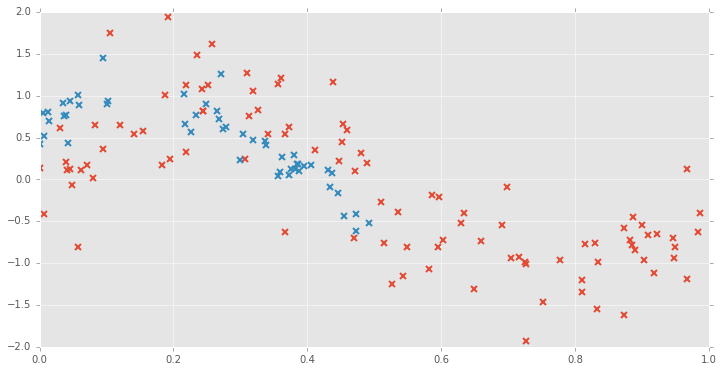

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(X1, Y1, 'x', mew=2)
plt.plot(X2, Y2, 'x', mew=2)
plt.ylim(-2, 2)

In [5]:
# build a variational model
lik = GPflow.likelihoods.SwitchedLikelihood([GPflow.likelihoods.StudentT(), GPflow.likelihoods.StudentT()])
k1 = GPflow.kernels.Matern32(1)
coreg = GPflow.kernels.Coregion(1, output_dim=2, rank=1, active_dims=[1])
kern = k1 * coreg
X_augmented = np.vstack((np.hstack((X1, np.zeros_like(X1))), np.hstack((X2, np.ones_like(X2)))))
Y_augmented = np.vstack((np.hstack((Y1, np.zeros_like(X1))), np.hstack((Y2, np.ones_like(X2)))))

m = GPflow.vgp.VGP(X_augmented, Y_augmented, kern=kern, likelihood=lik, num_latent=1)

In [6]:
_ = m.optimize(max_iters=5000)


/Users/james/anaconda/envs/py35/lib/python3.5/site-packages/tensorflow/python/ops/gradients.py:89: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


compiling tensorflow function...
done
optimization terminated, setting model state


      fun: array([ 74.37260415])
 hess_inv: <308x308 LbfgsInvHessProduct with dtype=float64>
      jac: array([  6.50390755e-03,  -7.66399575e-03,   9.32987847e-03,
         3.50010097e-03,   5.80033658e-03,   5.38754582e-03,
         3.92426051e-03,   2.22278999e-03,  -3.10726835e-03,
         5.13223129e-03,  -1.54032219e-03,   8.83414990e-04,
        -4.80251707e-03,   4.74019235e-03,   8.89460452e-03,
         5.89449856e-03,  -8.51750623e-03,   8.23293859e-03,
         8.83933797e-03,  -3.55870066e-03,   8.65734885e-03,
        -1.27208081e-03,  -4.44194557e-03,  -2.50445074e-03,
        -4.90570330e-03,  -5.28580125e-04,   2.26011620e-03,
        -3.27280894e-03,  -1.21756044e-03,   1.21042377e-03,
         8.42773432e-03,   8.35619676e-04,  -4.21854752e-03,
         2.32005592e-03,  -6.11256868e-03,  -8.95281546e-03,
        -1.29087807e-03,  -8.25386360e-04,  -1.35414797e-03,
         8.83435656e-03,   2.75575959e-03,  -3.95960863e-03,
         8.72175027e-03,   6.04544826e-03,

(-2, 2)

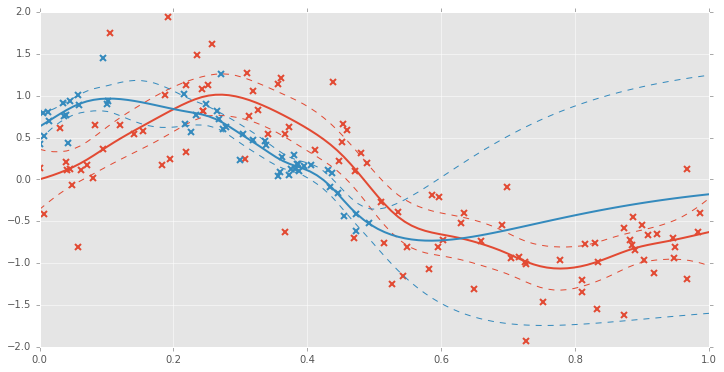

In [8]:
plt.figure(figsize=(12, 6))
xtest = np.linspace(0, 1, 100)[:,None]
line, = plt.plot(X1, Y1, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.zeros_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

line, = plt.plot(X2, Y2, 'x', mew=2)
mu, var = m.predict_f(np.hstack((xtest, np.ones_like(xtest))))
plt.plot(xtest, mu, color=line.get_color(), lw=2)
plt.plot(xtest, mu + 2*np.sqrt(var), '--', color=line.get_color())
plt.plot(xtest, mu - 2*np.sqrt(var), '--', color=line.get_color())

plt.ylim(-2, 2)

In [10]:
m.likelihood

Name,values,prior,constraint
likelihood.likelihood_list.item0.scale,[ 0.3405997],None,+ve
likelihood.likelihood_list.item1.scale,[ 0.11951363],None,+ve
